In [1]:
import matplotlib;


#import seaborn as sns
%pylab inline
#from netCDF4 import Dataset
import matplotlib.pyplot as plt;
import pickle

from pylab import *;
#import cartopy as cp
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
asin=np.arcsin
sqrt=np.sqrt
sin=np.sin
cos=np.cos
pi=np.pi
exp=np.exp
tan=np.tan
I=1j
inf=np.inf
pi=np.pi

import pandas as pd;

import cartopy as ct
#import arviz




%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
with open('DetStatic.pkl', 'rb') as f:
    DetStatic = pickle.load(f)

In [3]:
with open('NPATOM.pkl', 'rb') as f:
    NPATOM = pickle.load(f)

In [4]:
with open('NPFrugal.pkl', 'rb') as f:
    NPFrugal = pickle.load(f)

In [5]:
with open('NPControl.pkl', 'rb') as f:
    NPControl = pickle.load(f)

In [6]:
with open('NPTrans.pkl', 'rb') as f:
    NPTrans = pickle.load(f)

In [7]:
with open('NPGrowthRate.pkl', 'rb') as f:
    NPGrowthRate = pickle.load(f)

In [8]:
with open('NExportATOM.pkl', 'rb') as f:
    NExportATOM = pickle.load(f)
    
with open('PExportATOM.pkl', 'rb') as f:
    PExportATOM = pickle.load(f)
    
with open('NExportControl.pkl', 'rb') as f:
    NExportControl = pickle.load(f)
    
with open('PExportControl.pkl', 'rb') as f:
    PExportControl = pickle.load(f)
    
    
with open('NExportTrans.pkl', 'rb') as f:
    NExportTrans = pickle.load(f)
    
with open('PExportTrans.pkl', 'rb') as f:
    PExportTrans = pickle.load(f)
    
    
with open('NExportFrugal.pkl', 'rb') as f:
    NExportFrugal = pickle.load(f)
    
with open('PExportFrugal.pkl', 'rb') as f:
    PExportFrugal = pickle.load(f)
    
    
with open('NExportGrowthRate.pkl', 'rb') as f:
    NExportGrowthRate = pickle.load(f)
    
with open('PExportGrowthRate.pkl', 'rb') as f:
    PExportGrowthRate = pickle.load(f)

In [19]:
with open('latGrid.pkl', 'rb') as f:
    lat = pickle.load(f)
    
with open('lonGrid.pkl', 'rb') as f:
    lon = pickle.load(f)

In [10]:
NPExportGlobalATOM = sum(sum(NExportATOM*DetStatic,1),0)/sum(sum(PExportATOM*DetStatic,1),0)
NPExportGlobalControl = sum(sum(NExportControl*DetStatic,1),0)/sum(sum(PExportControl*DetStatic,1),0)
NPExportGlobalFrugal = sum(sum(NExportFrugal*DetStatic,1),0)/sum(sum(PExportFrugal*DetStatic,1),0)
NPExportGlobalGrowthRate = sum(sum(NExportGrowthRate*DetStatic,1),0)/sum(sum(PExportGrowthRate*DetStatic,1),0)
NPExportGlobalTrans = sum(sum(NExportTrans*DetStatic,1),0)/sum(sum(PExportTrans*DetStatic,1),0)

In [11]:
print([NPExportGlobalATOM,NPExportGlobalControl,NPExportGlobalFrugal,NPExportGlobalGrowthRate, NPExportGlobalTrans])

[16.35054245040543, 14.919116817198207, 17.593057993424775, 16.676270538086357, 16.218376324107073]


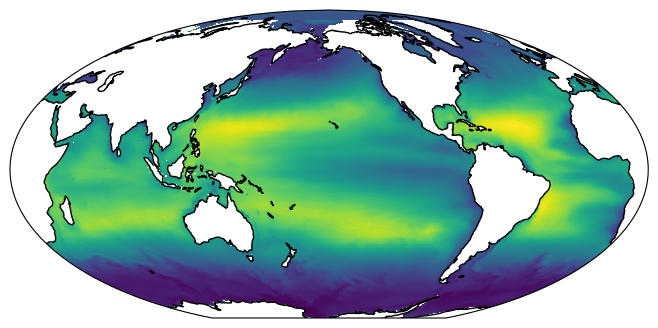

In [20]:
fig = plt.figure(figsize=(10,4))
projection = ct.crs.Mollweide(central_longitude=200)
proj2 = ct.crs.PlateCarree()



ax = fig.add_subplot(1,1,1,projection=projection)
ax.coastlines(resolution="110m")



ax.pcolormesh(lon,lat,NPATOM,transform=proj2,vmin=10,vmax=30,cmap="viridis")


#plt.savefig("NPPlotDynamic.png",bbox_inches="tight",dpi=300)

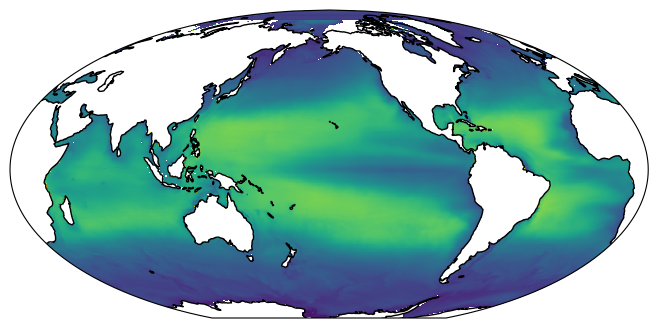

In [22]:
fig = plt.figure(figsize=(10,4))
projection = ct.crs.Mollweide(central_longitude=200)
proj2 = ct.crs.PlateCarree()



ax = fig.add_subplot(1,1,1,projection=projection)
ax.coastlines(resolution="110m")



ax.pcolormesh(lon,lat,NPGrowthRate,transform=proj2,vmin=10,vmax=30,cmap="viridis")



#plt.savefig("NPPlotGRH.png",bbox_inches="tight",dpi=300)

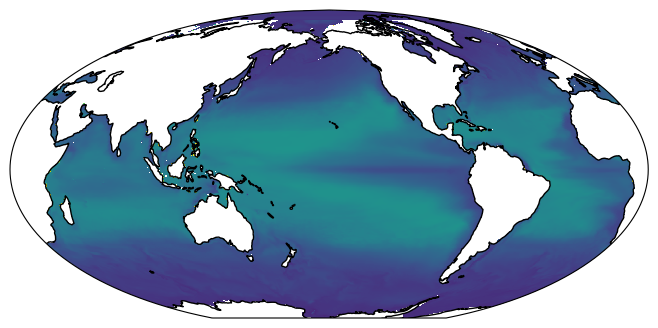

In [23]:
fig = plt.figure(figsize=(10,4))
projection = ct.crs.Mollweide(central_longitude=200)
proj2 = ct.crs.PlateCarree()



ax = fig.add_subplot(1,1,1,projection=projection)
ax.coastlines(resolution="110m")



ax.pcolormesh(lon,lat,NPControl,transform=proj2,vmin=10,vmax=30,cmap="viridis")


#ax.set_title("GM N:P",fontsize=24)


#plt.savefig("NPPlotStatic.png",bbox_inches="tight",dpi=300)

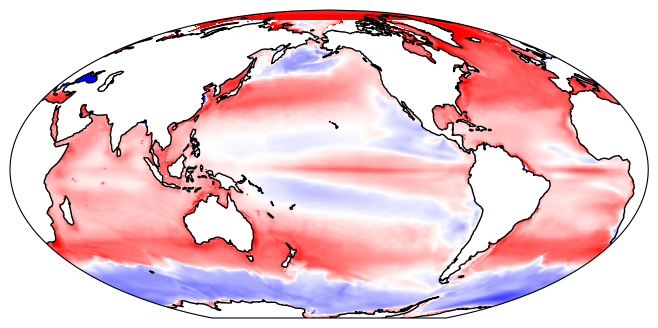

In [26]:
fig = plt.figure(figsize=(10,4))
projection = ct.crs.Mollweide(central_longitude=200)
proj2 = ct.crs.PlateCarree()



ax = fig.add_subplot(1,1,1,projection=projection)
ax.coastlines(resolution="110m")



ax.pcolormesh(lon,lat,NPFrugal-NPGrowthRate,transform=proj2,vmin=-7,vmax=7,cmap="bwr")




#plt.colorbar(ax,extend="both")
#plt.savefig("NPFrugalGrowthAnomaly.png",bbox_inches="tight",dpi=300)

(array([-7. , -2.5,  2.5,  7. ]),
 [Text(1, 0, ''), Text(1, 0, ''), Text(1, 0, ''), Text(1, 0, '')])

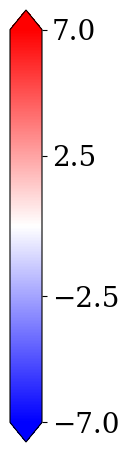

In [27]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig = plt.figure()
ax = fig.add_axes([0.8, 0.05, 0.05, 0.9])

cb = mpl.colorbar.ColorbarBase(ax, orientation='vertical', 
                               cmap='bwr',
                               norm=mpl.colors.Normalize(-7, 7),  # vmax and vmin
                               extend='both',
                               ticks=[-7,-2.5,2.5,7],
                              )
plt.yticks(fontsize=20)


#plt.savefig('NPFrugalGRHAnomalyColorbar.png', bbox_inches='tight',dpi=300)

(array([10, 15, 20, 25, 30]),
 [Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, '')])

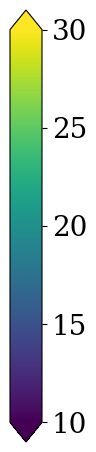

In [28]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig = plt.figure()
ax = fig.add_axes([0.8, 0.05, 0.05, 0.9])

cb = mpl.colorbar.ColorbarBase(ax, orientation='vertical', 
                               cmap='viridis',
                               norm=mpl.colors.Normalize(10, 30),  # vmax and vmin
                               extend='both',
                               ticks=[10, 15,20 ,25, 30],
                              )
plt.yticks(fontsize=20)


#plt.savefig('NPExportColorbar.png', bbox_inches='tight',dpi=300)

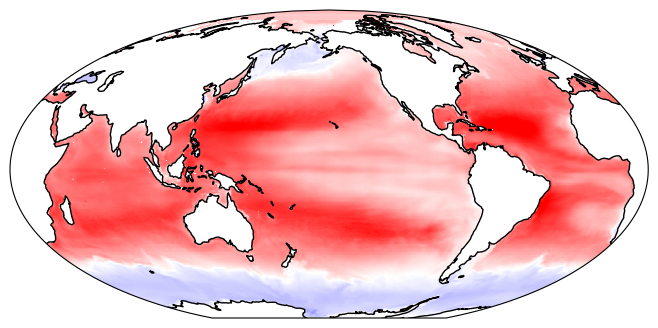

In [29]:
fig = plt.figure(figsize=(10,4))
projection = ct.crs.Mollweide(central_longitude=200)
proj2 = ct.crs.PlateCarree()



ax = fig.add_subplot(1,1,1,projection=projection)
ax.coastlines(resolution="110m")



ax.pcolormesh(lon,lat,NPATOM-NPControl,transform=proj2,vmin=-10,vmax=10,cmap="bwr")


#ax.set_title("GM N:P",fontsize=24)


#plt.savefig("NPPlotDynamicAnomaly.png",bbox_inches="tight",dpi=300)

(array([-10,  -5,   0,   5,  10]),
 [Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, '')])

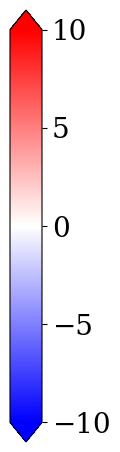

In [30]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig = plt.figure()
ax = fig.add_axes([0.8, 0.05, 0.05, 0.9])

cb = mpl.colorbar.ColorbarBase(ax, orientation='vertical', 
                               cmap='bwr',
                               norm=mpl.colors.Normalize(-10, 10),  # vmax and vmin
                               extend='both',
                               ticks=[-10, -5,0, 5, 10],
                              )
plt.yticks(fontsize=20)


#plt.savefig('NPExportAnomalyColorbar.png', bbox_inches='tight',dpi=300)

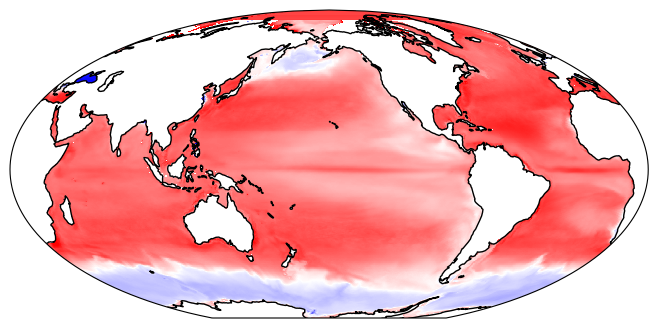

In [32]:
fig = plt.figure(figsize=(10,4))
projection = ct.crs.Mollweide(central_longitude=200)
proj2 = ct.crs.PlateCarree()



ax = fig.add_subplot(1,1,1,projection=projection)
ax.coastlines(resolution="110m")



ax.pcolormesh(lon,lat,NPFrugal-NPControl,transform=proj2,vmin=-10,vmax=10,cmap="bwr")




#plt.savefig("NPPlotFrugalAnomaly.png",bbox_inches="tight",dpi=300)

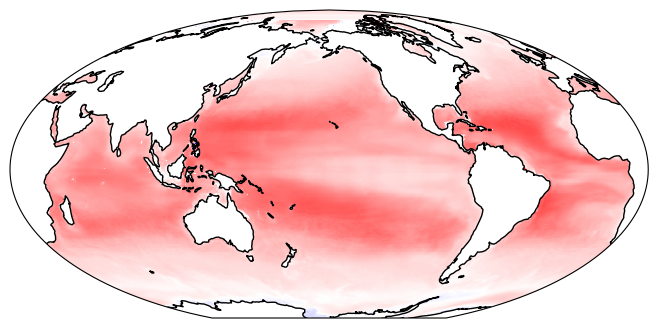

In [33]:
fig = plt.figure(figsize=(10,4))
projection = ct.crs.Mollweide(central_longitude=200)
proj2 = ct.crs.PlateCarree()



ax = fig.add_subplot(1,1,1,projection=projection)
ax.coastlines(resolution="110m")



ax.pcolormesh(lon,lat,NPGrowthRate-NPControl,transform=proj2,vmin=-10,vmax=10,cmap="bwr")




#plt.savefig("NPPlotGrowthRateAnomaly.png",bbox_inches="tight",dpi=300)

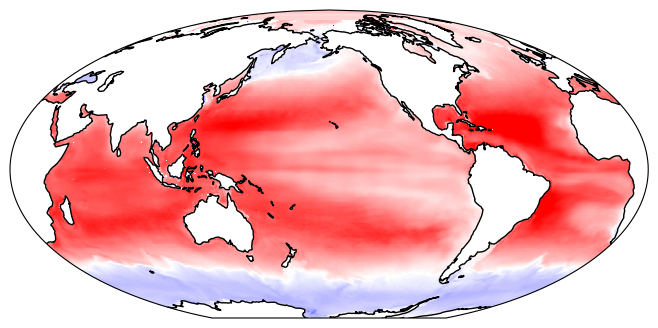

In [34]:
fig = plt.figure(figsize=(10,4))
projection = ct.crs.Mollweide(central_longitude=200)
proj2 = ct.crs.PlateCarree()



ax = fig.add_subplot(1,1,1,projection=projection)
ax.coastlines(resolution="110m")



ax.pcolormesh(lon,lat,NPTrans-NPControl,transform=proj2,vmin=-10,vmax=10,cmap="bwr")




#plt.savefig("NPPlotTransCompAnomaly.png",bbox_inches="tight",dpi=300)